# Simulating phenotypes

- Mock example with very small sample size and number of SNPs
- Simple example using 2 components (genetic and noise), and bi-allelic SNPs
- Frequencies to sample alleles: 0.1, 0.2, 0.3

In [21]:
# load libraries
library(data.table)
library(PhenotypeSimulator)

In [29]:
# simulate simple bi-allelic genotypes 
# 100 people, 30 SNP
# Allele frequencies 0.1, 0.2, 0.3, we need to think about better values for this
nsim = 100
genotypes = simulateGenotypes(N = nsim, NrSNP = 30, 
        frequencies = c(0.1, 0.2, 0.3), verbose = FALSE)
names(genotypes)

[1] "genotypes"  "freq"       "id_snps"    "id_samples"

In [30]:
# this is pretty simple, it just create fake SNP with a given allele frequencies
head(genotypes$genotypes)

,SNP_1,SNP_2,SNP_3,SNP_4,SNP_5,SNP_6,SNP_7,SNP_8,SNP_9,SNP_10,⋯,SNP_21,SNP_22,SNP_23,SNP_24,SNP_25,SNP_26,SNP_27,SNP_28,SNP_29,SNP_30
ID_1,0,0,1,0,0,0,0,1,0,0,⋯,0,2,0,0,1,0,1,0,0,1
ID_2,0,1,0,0,0,0,1,0,1,0,⋯,0,1,1,0,0,0,1,0,0,0
ID_3,0,0,1,0,0,1,0,0,0,2,⋯,0,0,1,0,0,0,1,1,0,0
ID_4,1,1,1,0,2,0,0,0,0,0,⋯,0,1,1,0,0,0,0,0,1,0
ID_5,0,0,0,1,0,0,0,0,0,0,⋯,0,1,0,1,0,2,1,0,0,1
ID_6,1,0,0,0,0,0,1,0,0,2,⋯,0,0,2,0,0,0,1,1,0,1


In [24]:
# then, we can assign (randomly) causal SNP to that matrix
# and genetic effects
# P = number of traits simulated, in this case only one
causalSNPs = getCausalSNPs(N = nsim, genotypes = genotypes$genotypes, 
    NrCausalSNPs = 10, verbose = FALSE)
genFixed <- geneticFixedEffects(N = nsim, P = 1, X_causal = causalSNPs, 
    pIndependentGenetic = 1) 
# effects simulated for the causal SNP selected (a fake GWAS)
t(genFixed$cov_effect)


,Trait_1
independentEffect1_SNP_3,-1.2180380
independentEffect2_SNP_7,1.2355717
independentEffect3_SNP_11,0.5500125
independentEffect4_SNP_14,-1.2414441
independentEffect5_SNP_21,-1.6153626
independentEffect6_SNP_22,-1.4464035
independentEffect7_SNP_25,1.0247222
independentEffect8_SNP_27,-0.2788519
independentEffect9_SNP_28,-1.0862980
independentEffect10_SNP_30,1.5797855


In [31]:
# to simulate the phenotype we need to define other factors
# in this case I am just adding noise, but we can add effect of covariates, culture, etc.
# I am only using independent effect because we are using only one trait.
noiseBg = noiseBgEffects(N = nsim, P = 1, share = FALSE)
t(noiseBg$cov_independent)


0.08341913


In [32]:
# to define the phenotype we set parameters on the variance composition of the phenotype

# parameters (pretty simple example)
genVar = 0.3 # genetic variability
noiseVar <- 1 - genVar # noise variability 

# rescale phenotype components so that variance composition match parameters above
genFixed_independent_scaled = rescaleVariance(genFixed$independent, genVar)
noiseBg_independent_scaled <- rescaleVariance(noiseBg$independent, noiseVar)

# total variance proportion shave to add up yo 1
total <-  noiseVar + genVar
total == 1

[1] TRUE

    Trait_1       
 Min.   :-2.1583  
 1st Qu.:-0.8123  
 Median :-0.1425  
 Mean   :-0.1676  
 3rd Qu.: 0.4468  
 Max.   : 1.9684  

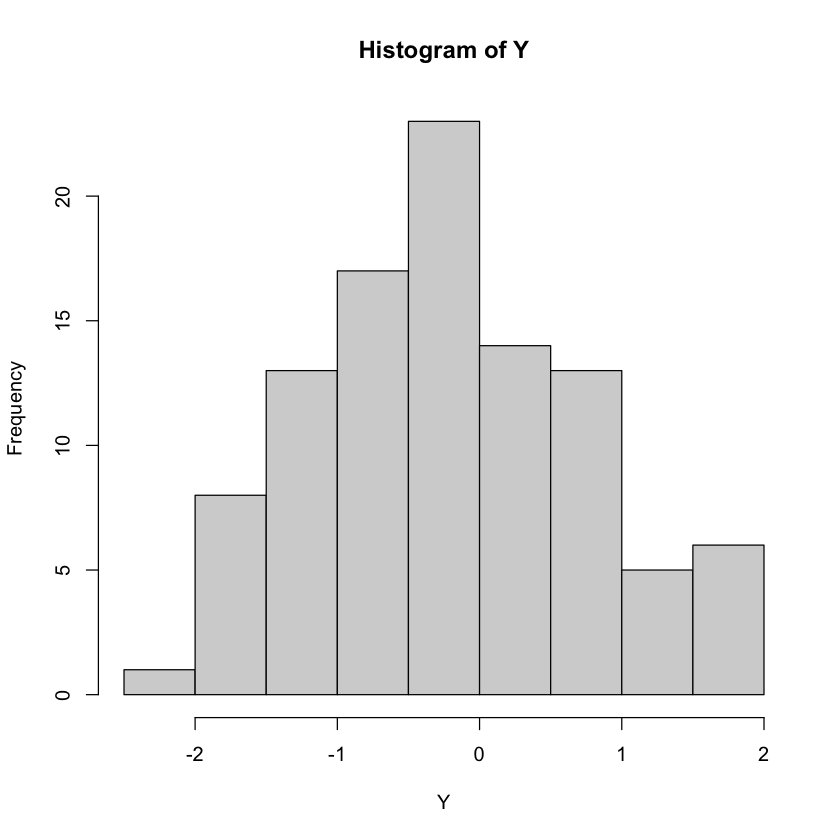

In [35]:
# combine components into final phenotype
Y <- genFixed_independent_scaled$component + noiseBg_independent_scaled$component
summary(Y)
hist(Y)


# Reproduction?

Let's assume individual 30 mates with 40:

In [40]:
# What would be the new genotype info? 
# A simple mathematical rule?
t(genotypes$genotypes[c(30, 40), ])


,ID_30,ID_40
SNP_1,0,0
SNP_2,2,2
SNP_3,1,0
SNP_4,0,0
SNP_5,0,0
SNP_6,0,0
SNP_7,2,0
SNP_8,0,0
SNP_9,0,1
SNP_10,0,0
